# Importing Libraries..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

### Read the dataset

In [2]:
df = pd.read_csv("Flight.csv")

### Check the dataset

In [3]:
df.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


In [4]:
df.shape

(88, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person           88 non-null     object 
 1   Item_Identifier  88 non-null     object 
 2   Length           71 non-null     float64
 3   Breadth          88 non-null     float64
 4   PaperQuality     80 non-null     object 
 5   Angle            84 non-null     object 
 6   Foldings         88 non-null     int64  
 7   Windspeed        88 non-null     object 
 8   Dominanthand     88 non-null     object 
 9   Distance         88 non-null     int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.0+ KB


In [6]:
df.describe()

,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


### is any Null Values?

In [7]:
df.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

Length, PaperQuality, Angle have missing values..

#### Null values in length is replaced by its mean value

In [8]:
df.Length.fillna(df.Length.mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1724abf40>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1724c95e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1724abaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1724c9d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1724d60d0>],
 'means': []}

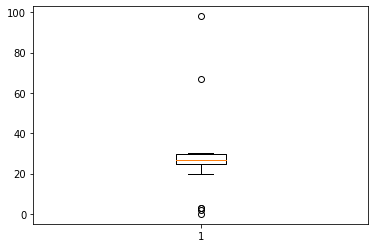

In [9]:
plt.boxplot(df.Length)

#### Handling Outlier (Length)

In [10]:
q3 = df["Length"].quantile(0.75)  
q1 = df["Length"].quantile(0.25)
IQR = q3 - q1
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
df['Length'] = np.where(df['Length'] >= upper_limit,upper_limit,np.where(df['Length'] <= lower_limit,lower_limit,df['Length']))

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1725bd760>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1725bde80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1725bd3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1725cb5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1725cb970>],
 'means': []}

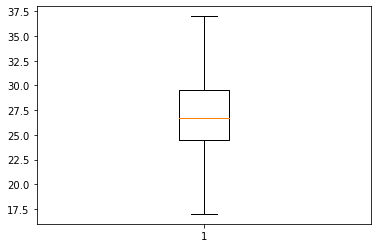

In [11]:
plt.boxplot(df['Length'])

### Handling Null values in paperQuality is replaced by the help of ItemIdentifier
#### Every flight has the same paper quality in all observations.

In [12]:
for j in df[df['PaperQuality'].isnull()].index.tolist():
    df.PaperQuality.iloc[j] =  df.PaperQuality[df['Item_Identifier']==df['Item_Identifier'].iloc[j]].mode().max()

C:\Users\raman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperQuality', ylabel='count'>

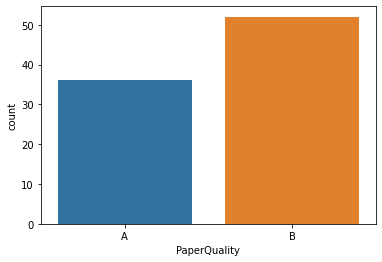

In [13]:
sns.countplot(df['PaperQuality'])

### Handling Null values in Angle by the help of Person.

In [14]:
for j in df[df['Angle'].isnull()].index.tolist():
    df.Angle.iloc[j] =  df.Angle[df['Person']==df['Person'].iloc[j]].mode().max()

C:\Users\raman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle', ylabel='count'>

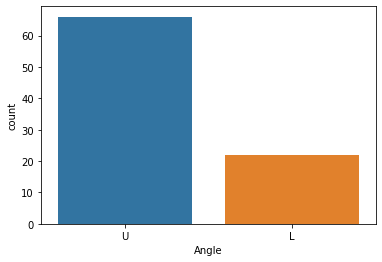

In [15]:
sns.countplot(df['Angle'])

In [16]:
df.isnull().sum()

Person             0
Item_Identifier    0
Length             0
Breadth            0
PaperQuality       0
Angle              0
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
dtype: int64

Oh Yeah!! No Null values..!!!

In [17]:
df.columns

Index(['Person', 'Item_Identifier', 'Length', 'Breadth', 'PaperQuality',
       'Angle', 'Foldings', 'Windspeed ', 'Dominanthand', 'Distance'],
      dtype='object')

### Here column Windspeed have trailing white space. Let Fix this..
#### Remove extra space after column name

In [18]:
df.columns = df.columns.str.replace(' ','')

In [19]:
df.columns

Index(['Person', 'Item_Identifier', 'Length', 'Breadth', 'PaperQuality',
       'Angle', 'Foldings', 'Windspeed', 'Dominanthand', 'Distance'],
      dtype='object')

### is windspeed really affects Distance?
#### Let check it with scatter plot and pearson test

<AxesSubplot:xlabel='Windspeed', ylabel='Distance'>

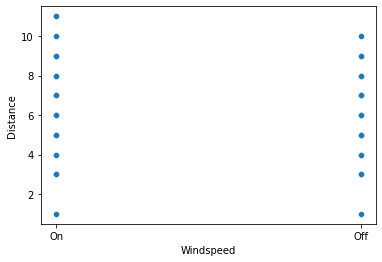

In [20]:
sns.scatterplot(x=df.Windspeed,y=df.Distance)

In [21]:
corr , p = pearsonr(df.Distance[df['Windspeed']=='On'],df.Distance[df['Windspeed']=='Off'])

In [22]:
p

0.469690377478983

### P value is greater than 0.05 , Distance is Not affted by Windspeed

### Task : Create a column that includes whether the person is thrown by his dominant or not.
For example, if a person is actually a left-hander, he can also throw the flight with the right hand. For this case, our new column should know he/she is not thrown by the dominant hand. (Yes/No)

#### Create a new column 'isDominant'

In [23]:
df.insert(9,'isDominant','Yes')

### isDominant column values are filled based on the person's maximum throwing hand...

In [24]:
row,col = df.shape
for i in range(row):
    if df.Dominanthand[df['Person']==df.Person.iloc[i]].mode().max() != df.Dominanthand.iloc[i]:
        df.isDominant.iloc[i] = 'No'

C:\Users\raman\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
df.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,isDominant,Distance
0,Kevin,Som,29.000000,20.0,A,U,8,On,L,Yes,5
1,Kevin,kevin,23.000000,16.0,B,U,8,On,L,Yes,5
2,Kevin,RR,26.708451,18.0,A,L,10,On,R,No,6
3,Priya,Nithya,27.000000,20.0,A,U,10,On,R,Yes,4
4,Priya,Priya,29.500000,17.5,B,U,5,Off,R,Yes,8


### One more New Column "DistanceClf"

For this dataset we have to predict distance, which is continuous data. So we will be able to do all the regression stuff. But  for doing classification, our distance should be in discrete data type. For that I'm gonna add a new column that includes Below_5 as 0 and Above_5 as 1 wich is discrete.

In [26]:
df['DistanceClf'] = df.Distance

In [27]:
df.loc[df["DistanceClf"] < 5, "DistanceClf"] = 0
df.loc[df["DistanceClf"] != 0, "DistanceClf"] = 1

In [28]:
df.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,isDominant,Distance,DistanceClf
0,Kevin,Som,29.000000,20.0,A,U,8,On,L,Yes,5,1
1,Kevin,kevin,23.000000,16.0,B,U,8,On,L,Yes,5,1
2,Kevin,RR,26.708451,18.0,A,L,10,On,R,No,6,1
3,Priya,Nithya,27.000000,20.0,A,U,10,On,R,Yes,4,0
4,Priya,Priya,29.500000,17.5,B,U,5,Off,R,Yes,8,1



#### column Person and Item_Identifier was dropped as it did not affect distance

In [29]:
df.drop(['Person','Item_Identifier'],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Length        88 non-null     float64
 1   Breadth       88 non-null     float64
 2   PaperQuality  88 non-null     object 
 3   Angle         88 non-null     object 
 4   Foldings      88 non-null     int64  
 5   Windspeed     88 non-null     object 
 6   Dominanthand  88 non-null     object 
 7   isDominant    88 non-null     object 
 8   Distance      88 non-null     int64  
 9   DistanceClf   88 non-null     int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.0+ KB


##### As you see above info some columns have object data type. We know that the regression and classification algorithm only works with float or int, not object type. So Time to use pd.get_dummies..

In this dataset, we know column 'Foldings' is discrete type. by converting that column to str, pd.dummies will able to process Foldings as discrete 

In [31]:
df["Foldings"]= df["Foldings"].astype(str)

In [32]:
df = pd.get_dummies(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          88 non-null     float64
 1   Breadth         88 non-null     float64
 2   Distance        88 non-null     int64  
 3   DistanceClf     88 non-null     int64  
 4   PaperQuality_A  88 non-null     uint8  
 5   PaperQuality_B  88 non-null     uint8  
 6   Angle_L         88 non-null     uint8  
 7   Angle_U         88 non-null     uint8  
 8   Foldings_10     88 non-null     uint8  
 9   Foldings_5      88 non-null     uint8  
 10  Foldings_8      88 non-null     uint8  
 11  Windspeed_Off   88 non-null     uint8  
 12  Windspeed_On    88 non-null     uint8  
 13  Dominanthand_L  88 non-null     uint8  
 14  Dominanthand_R  88 non-null     uint8  
 15  isDominant_No   88 non-null     uint8  
 16  isDominant_Yes  88 non-null     uint8  
dtypes: float64(2), int64(2), uint8(13)
me

In [34]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [35]:
scalerData = scaler.transform(df)
scalerData = pd.DataFrame(scalerData)

In [36]:
scalerData.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.467809,0.555556,0.509091,0.829545,0.409091,0.590909,0.250000,0.750000,0.340909,0.181818,0.477273,0.500000,0.500000,0.204545,0.795455,0.136364,0.863636
std,0.198449,0.297571,0.197476,0.378187,0.494484,0.494484,0.435494,0.435494,0.476731,0.387905,0.502346,0.502865,0.502865,0.405681,0.405681,0.345141,0.345141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.333333,0.400000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.485423,0.555556,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,0.000000,1.000000
75%,0.625000,0.888889,0.600000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
x = df.drop(['Distance','DistanceClf'],axis=1)

# Regression
For Regression our Y is Distance which is continuous

In [38]:
y = df['Distance']

### Splitting the dataset into training and testing set

In [39]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

## 1. Linear Regression

In [40]:
def LinearReg(train_x,train_y):
    modelLinear=LinearRegression()
    modelLinear.fit(train_x,train_y)
    return mean_squared_error(test_y, modelLinear.predict(test_x), squared=False)

## 2. DecisionTree Regression

In [41]:
def DecisionTreeReg(train_x,train_y):
    modeldtr = DecisionTreeRegressor(random_state=42)
    modeldtr.fit(train_x,train_y)
    return mean_squared_error(test_y, modeldtr.predict(test_x), squared=False)

## 3. RandomForest Regression

In [42]:
def RandomForestReg(train_x,train_y):
    modelRFR = RandomForestRegressor(max_depth=2, random_state=42)
    modelRFR.fit(train_x,train_y)
    return mean_squared_error(test_y, modelRFR.predict(test_x), squared=False)

## 4.GradientBoosting Regressor

In [43]:
def GradientBoostingReg(train_x,train_y):
    modelgbr = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=42)
    modelgbr.fit(train_x,train_y)
    return mean_squared_error(test_y, modelgbr.predict(test_x), squared=False)

## 5. AdaBoost Regressor

In [44]:
def AdaBoostReg(train_x,train_y):
    modelabr = AdaBoostClassifier(random_state=42)
    modelabr.fit(train_x,train_y)
    return mean_squared_error(test_y, modelabr.predict(test_x), squared=False)

# Classification
For Regression our Y is DistanceClf which is discrete

In [45]:
y = df['DistanceClf']

In [46]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

## 1. Logistic Regression

In [47]:
def LogisticReg(train_x,train_y):
    modelLogistic=LogisticRegression()
    modelLogistic.fit(train_x,train_y)
    return mean_squared_error(test_y, modelLogistic.predict(test_x), squared=False)

## 2. DecisionTree Classifier

In [48]:
def DecisionTreeClf(train_x,train_y):
    modeldtc = DecisionTreeClassifier(random_state=42)
    modeldtc.fit(train_x,train_y)
    return mean_squared_error(test_y, modeldtc.predict(test_x), squared=False)

## 3. RandomForset Classifier

In [49]:
def RandomForestClf(train_x,train_y):
    modelrfc = RandomForestClassifier(max_depth=2, random_state=42)
    modelrfc.fit(train_x,train_y)
    return mean_squared_error(test_y, modelrfc.predict(test_x), squared=False)

## 4. GradientBoosting Classifier

In [50]:
def GradientBoostingClf(train_x,train_y):
    modelgbc = GradientBoostingClassifier(n_estimators=100,max_depth=2, random_state=42)
    modelgbc.fit(train_x,train_y)
    return mean_squared_error(test_y, modelgbc.predict(test_x), squared=False)

## 5. AdaBoost Classifier

In [51]:
def AdaBoostClf(train_x,train_y):
    modelabc = AdaBoostClassifier(random_state=45)
    modelabc.fit(train_x,train_y)
    return mean_squared_error(test_y, modelabc.predict(test_x), squared=False)

# Let's conclude which algorithm is best fits for our dataset

## For Regression:

An User-defined function that do all the regression model and return best model by comparing Root Mean Squared Error.

In [52]:
def Regression(train_x,train_y):
    regFunc = [LinearReg,DecisionTreeReg,RandomForestReg,GradientBoostingReg,AdaBoostReg]
    reg = ['Linear Regression','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression','AdaBoost Regression']
    rmseScoreReg = []
    for i in regFunc:
        rmseScoreReg.append(i(train_x,train_y))      
    return reg[rmseScoreReg.index(min(rmseScoreReg))],"is the best fit for predictions"

In [53]:
print(Regression(train_x,train_y))

('Random Forest Regression', 'is the best fit for predictions')


####  For Regression, the Random Forest algorithm is best fit as it has less RMSE value than other regression algorithms.

## For Classification:

An User-defined function that do all the classification model and return best model by comparing Root Mean Squared Error.

In [54]:
def Classification(train_x,train_y):
    clfFunc = [LogisticReg,DecisionTreeClf,RandomForestClf,GradientBoostingClf,AdaBoostClf]
    clf = ['LogisticRegression','Decision Tree Classification','Random Forest Classification','Gradient Boosting Classification','AdaBoost Classification']
    rmseScoreClf = []
    for j in clfFunc:
        rmseScoreClf.append(j(train_x,train_y))      
    return clf[rmseScoreClf.index(min(rmseScoreClf))],"is the best fit for predictions"

In [55]:
print(Classification(train_x,train_y))

C:\Users\raman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('LogisticRegression', 'is the best fit for predictions')


#### For Classification, the Logistic Regression algorithm is best fit as it has less RMSE value than other classification algorithms.